In [1]:
# Enable code formatting using external plugin: nb_black.
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Normal Equation

### Objective

Implement multivariate **Linear Regression** using _Normal Equation_ technique.

<a id="#[1]-Setup"></a>
# [1] Setup

### Import and configure required libraries

In [2]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import prettytable
from prettytable import PrettyTable


# Library versions used in below EDA.
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("PrettyTable version:", prettytable.__version__)

# Configure NumPy.
# Set `Line width` to Maximum 130 characters in the output, post which it will continue in next line.
np.set_printoptions(linewidth=130)

# Configure Pandas.
# Set display width to maximum 130 characters in the output, post which it will continue in next line.
pd.options.display.width = 130

# Configure Seaborn.
sns.set_style("whitegrid")  # Set white background with grid.
sns.set_palette("deep")  # Set color palette.
sns.set_context("paper", font_scale=1.5)  # Set font to scale 1.5 more than normal.

NumPy version: 1.21.5
Pandas version: 1.4.2
Matplotlib version: 3.5.1
Seaborn version: 0.11.2
PrettyTable version: 3.3.0


<IPython.core.display.Javascript object>

#### Common functions

In [3]:
def get_shape(np_array):
    if not isinstance(np_array, np.ndarray):
        raise ValueError(f"Received {type(np_array)} instead of numpy array.")

    if np_array.size == 0:
        raise ValueError(f"Received empty numpy array.")

    shape = list(np_array.shape)
    return (shape.pop(), None) if len(shape) == 1 else (shape[0], shape[1])


ENABLE_LOG = False


def text(*args):
    """
    Function to print() input string when logging is enabled.
    """
    if ENABLE_LOG is True:
        print(*args)


def title(title_str, padding=[1, 1], line_style="="):
    """
    Function to print() input string with some styles, when logging is enabled.
    """
    if ENABLE_LOG is True:
        pad_top, pad_bot = padding
        pt = "\n" * pad_top
        pb = "\n" * pad_bot
        print(pt + title_str + "\n" + line_style * len(title_str) + pb)

<IPython.core.display.Javascript object>

#### Load data-points from the `.csv` file

In [4]:
uv_df = pd.read_csv("./univariate_data_points.csv")
uv_df.head()

,X,Y
0,171,183
1,15,84
2,9,85
3,219,228
4,154,199


<IPython.core.display.Javascript object>

# [2] Data Analysis

In [5]:
rows, cols = uv_df.shape

print("Rows:", rows)
print("Columns:", cols)

Rows: 500
Columns: 2


<IPython.core.display.Javascript object>

In [6]:
uv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       500 non-null    int64
 1   Y       500 non-null    int64
dtypes: int64(2)
memory usage: 7.9 KB


<IPython.core.display.Javascript object>

In [7]:
uv_df.apply(max)

X    298
Y    272
dtype: int64

<IPython.core.display.Javascript object>

#### Plot attributes

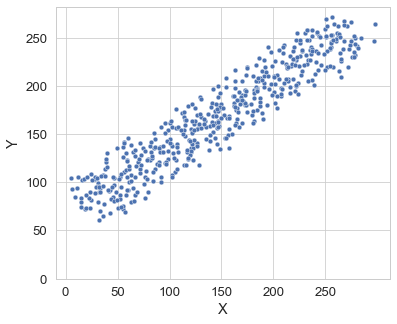

<IPython.core.display.Javascript object>

In [8]:
plt.figure(figsize=(6, 5))

sns.scatterplot(data=uv_df, x="X", y="Y")
plt.xticks(ticks=range(0, 300, 50))
plt.yticks(ticks=range(0, 280, 50))

plt.show()

# [3] Implementation

Implement Linear Regression with below features:

1. Normal Equation technique.
2. Regularization.

### Cost Function `J(θ)`

$ J(\theta) = \frac{1}{2m} \sum_{i = 1}^{m} \frac{1}{2} (h_{\theta}(x^{(i)}) - y^{(i)})^{2} $

### Normal Equation

$ \theta = (X^{T}X)^{-1}(X^{T}y) $

#### Linear Regression

In [9]:
from numpy.linalg import pinv


def linear_regression(X, Y, theta=None, scaling=True):
    """
    Closure to implement multivariate Linear Regression using Normal Equation technique.
    """
    PRECISION = 6

    def preprocess(features):
        """
        Function to preprocess input variables:
            1. Reshape univariate dataset if necessary.
            2. Adding dummy feature theta-zero.
        """
        rows, cols = get_shape(features)

        if not cols:
            # 1. Reshape NumPy array to vector.
            text("Reshaping NumPy array, univariate feature, to vector.")
            features = features.reshape((rows, 1))

        # 2. Add dummy feature X0 for y-intercept into features
        X_0 = np.ones((rows, 1), features.dtype)
        return np.hstack((X_0, features))  # Concatenate horizontally.

    # Preprocessing feature.
    X = preprocess(X)

    m, n = get_shape(X)
    # m: Total number for records or data-points
    # n: Total number for input-variables or features.

    # Initialize empty model parameters if not present.
    if not theta:
        theta = np.zeros(n)

    def fit():
        """
        Train model using Linear Regression.
        """
        nonlocal theta

        title("Linear Regression")
        text("Model Attributes:")
        text("\tX shape:", get_shape(X))
        text("\tY shape:", get_shape(Y))
        text("\tθ shape:", get_shape(theta))

        def h(X):
            """
            Function to compute hypothesis using matrix multiplication technique.
            This hypothesis is a Linear Regression model.
            """
            return np.matmul(theta, X.transpose())

        def normal_equation():
            """
            Function to minimize Squared Error cost function using Normal Equation.
            """
            X_T = X.transpose()

            """
            From NumPy use `pinv()` (pseudo-inverse) instead of 
            `inv()` (inverse) to handel non-invertible matrices.
            """
            lhs = pinv(np.matmul(X_T, X))
            rhs = np.matmul(X_T, Y)

            theta_ = np.around(np.matmul(lhs, rhs), PRECISION)

            # Return updated Theta.
            return theta_

        text("\nModel training started.")

        theta = normal_equation()
        text("Model parameters:", theta.tolist())

        text("Model training complete!\n")

        def predict(features, precision=PRECISION):
            """
            Function to predict target value for the given features.
            """
            # Preprocessing features before predicting target.
            pp_f = preprocess(np.array(features, ndmin=2))

            # Predict and return target value.
            y = round(h(pp_f).item(), precision)
            return (y, theta.tolist())

        return predict

    return fit

<IPython.core.display.Javascript object>

<a id="#[4]-Training-Model"></a>
# [4] Training Model

#### Initialize Regressor

In [10]:
X = uv_df["X"].values
Y = uv_df["Y"].values

fit = linear_regression(X, Y)

<IPython.core.display.Javascript object>

Train model using training dataset.

> Note: Set `ENABLE_LOG` to `False` to train model silently (without logs)

In [11]:
ENABLE_LOG = True

# Fit Linear Regression model.
predict = fit()


Linear Regression

Model Attributes:
	X shape: (500, 2)
	Y shape: (500, None)
	θ shape: (2, None)

Model training started.
Model parameters: [70.125826, 0.673228]
Model training complete!



<IPython.core.display.Javascript object>

<a id="#[5]-Testing-Model"></a>
# [5] Testing Model

#### Test 1: Univariate dataset

In [12]:
x = [200]
y, model_params = predict(x, precision=0)

print("Output:")
print("Input features:", x),
print("Predicted target:", y)
print("Model parameters fit to the dataset:", model_params)

Output:
Input features: [200]
Predicted target: 205.0
Model parameters fit to the dataset: [70.125826, 0.673228]


<IPython.core.display.Javascript object>

#### Plot Model

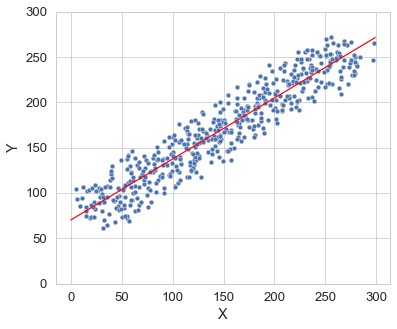

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=(6, 5))

t0, t1 = model_params

x = range(0, 300)
y = [t0 + t1 * i for i in x]

# Model
sns.lineplot(x=x, y=y, color="red")

# Data points
sns.scatterplot(data=uv_df, x="X", y="Y")
plt.xticks(ticks=range(0, 350, 50))
plt.yticks(ticks=range(0, 350, 50))

plt.show()

#### Test 2: Multivariate dataset

In [14]:
ENABLE_LOG = True

X = np.array(
    [
        [20, 2, 100],
        [26, 1, 103],
        [25, 0, 109],
        [24, 5, 102],
        [29, 4, 100],
    ]
)
Y = np.array([300, 301, 302, 303, 304])

# Initialize Regressor
fit = linear_regression(X, Y)

# Fit Linear Regression model.
predict = fit()

# Predict target.
x = [29, 4, 101]
y, _ = predict(x, precision=0)

print("Output:")
print("Input features:", x),
print("Predicted target:", y)


Linear Regression

Model Attributes:
	X shape: (5, 4)
	Y shape: (5, None)
	θ shape: (4, None)

Model training started.
Model parameters: [273.010862, 0.291961, 0.626298, 0.19694]
Model training complete!

Output:
Input features: [29, 4, 101]
Predicted target: 304.0


<IPython.core.display.Javascript object>